In [5]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt

## Volatility comparison 

In [6]:
SV = ['HESTON','SVJ','SVCJ']
MODELS = ['BLACK_SCHOLES','MERTON']

In [7]:
df = pd.read_csv(f'_output/calibration/results/20210227_195345/HESTON/parameters.csv',usecols=['date'])

for x in SV:
    df[x]= pd.read_csv(f'_output/calibration/results/20210227_195345/{x}/parameters.csv')['XI']
    df[x][df[x].idxmax()] =np.mean(df[x])
    

<ipython-input-7-c28065f00434>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x][df[x].idxmax()] =np.mean(df[x])


In [8]:
for x in MODELS:
    df[x] = pd.read_csv(f'_output/calibration/results/20210227_195345/{x}/parameters.csv')['SIGMA']


In [9]:
df

,date,HESTON,SVJ,SVCJ,BLACK_SCHOLES,MERTON
0,20190429,0.990252,0.530464,0.897529,0.501331,0.676573
1,20190401,0.000010,0.092039,0.923122,0.603325,0.696601
2,20190402,0.965800,0.000083,0.526248,0.614840,0.661895
3,20190507,0.852617,0.000120,0.536583,0.649361,0.607468
4,20190506,0.706287,0.000150,0.000010,0.574612,0.688565
...,...,...,...,...,...,...
453,20200701,0.494731,0.354151,0.561783,0.619274,0.425029
454,20200629,0.302287,0.883717,0.545478,0.625013,0.434876
455,20200628,0.412282,0.502888,0.165584,0.618455,0.427063
456,20200627,0.241308,1.078480,0.445309,0.612859,0.412152


In [10]:
df['SVJ'][df['SVJ'].idxmax()] =np.mean(df['SVJ'])

<ipython-input-10-a12e8b5a2ea9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SVJ'][df['SVJ'].idxmax()] =np.mean(df['SVJ'])


In [11]:
max(df['SVJ'])

1.5676510000000001

In [12]:
df.date = pd.to_datetime(df.date,format='%Y%m%d')
df = df.sort_values(by='date')
df = df.set_index('date')

In [13]:
#df = df[(df.index >= '2019-04-01') & (df.index < '2019-10-01')]
#df = df[(df.index >= '2019-10-01') & (df.index < '2020-02-01')]
#df = df[(df.index >= '2020-02-01') & (df.index < '2020-07-01')]

In [14]:
SV_PLOT = {'HESTON':'purple','SVJ':'grey','SVCJ':'orange'}


In [15]:
SV_PLOT.items()

dict_items([('HESTON', 'purple'), ('SVJ', 'grey'), ('SVCJ', 'orange')])

### 3 separate pictures

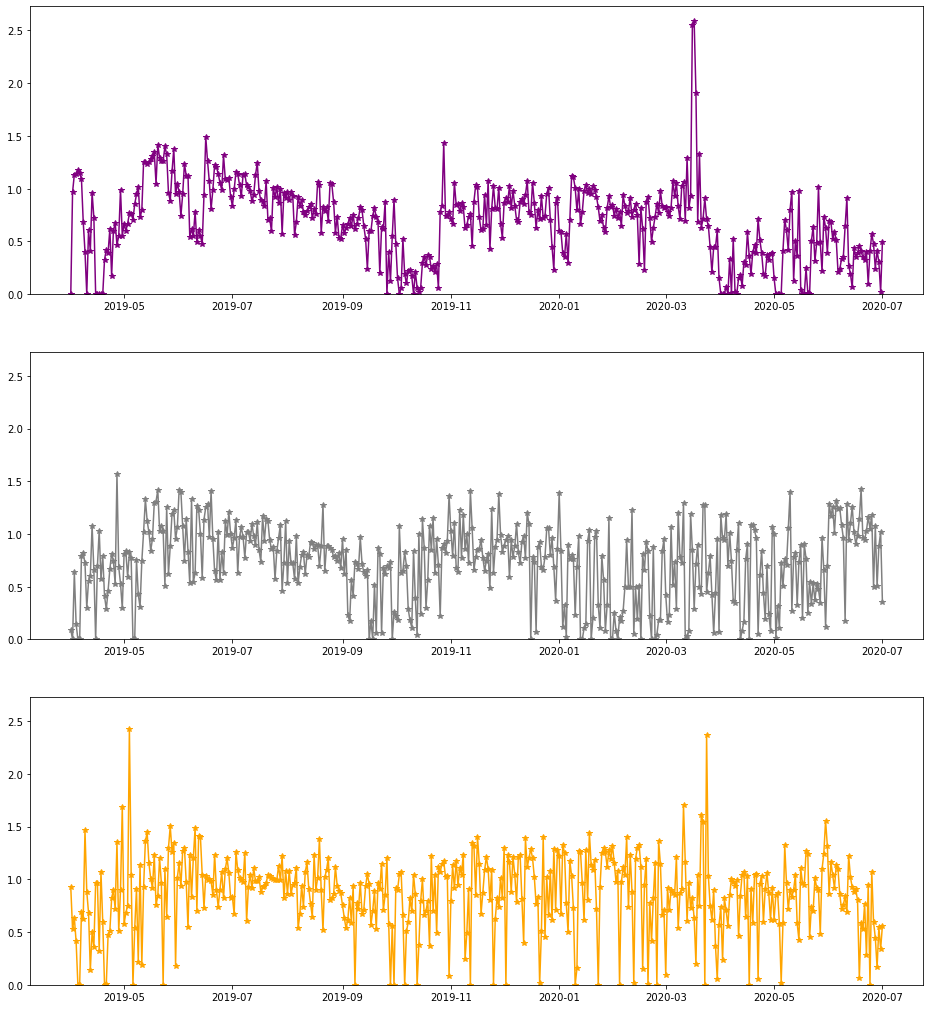

In [30]:
fig, axs = plt.subplots(nrows=3, figsize=(16, 18))

for (x, y), ax in zip(SV_PLOT.items(), axs):
    ax.plot(df[x], color=y, marker='*')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_ylim((0,0.3 + max(df['SVCJ'])))



fig.savefig(f'_output/calibration/results/20210227_195345/plots/test.png',transparent=True)

In [35]:
df1 = df[(df.index >= '2019-04-01') & (df.index < '2019-10-01')]
df2 = df[(df.index >= '2019-10-01') & (df.index < '2020-02-01')]
df3 = df[(df.index >= '2020-02-01') & (df.index < '2020-07-01')]
SV_list = [df1,df2,df3]

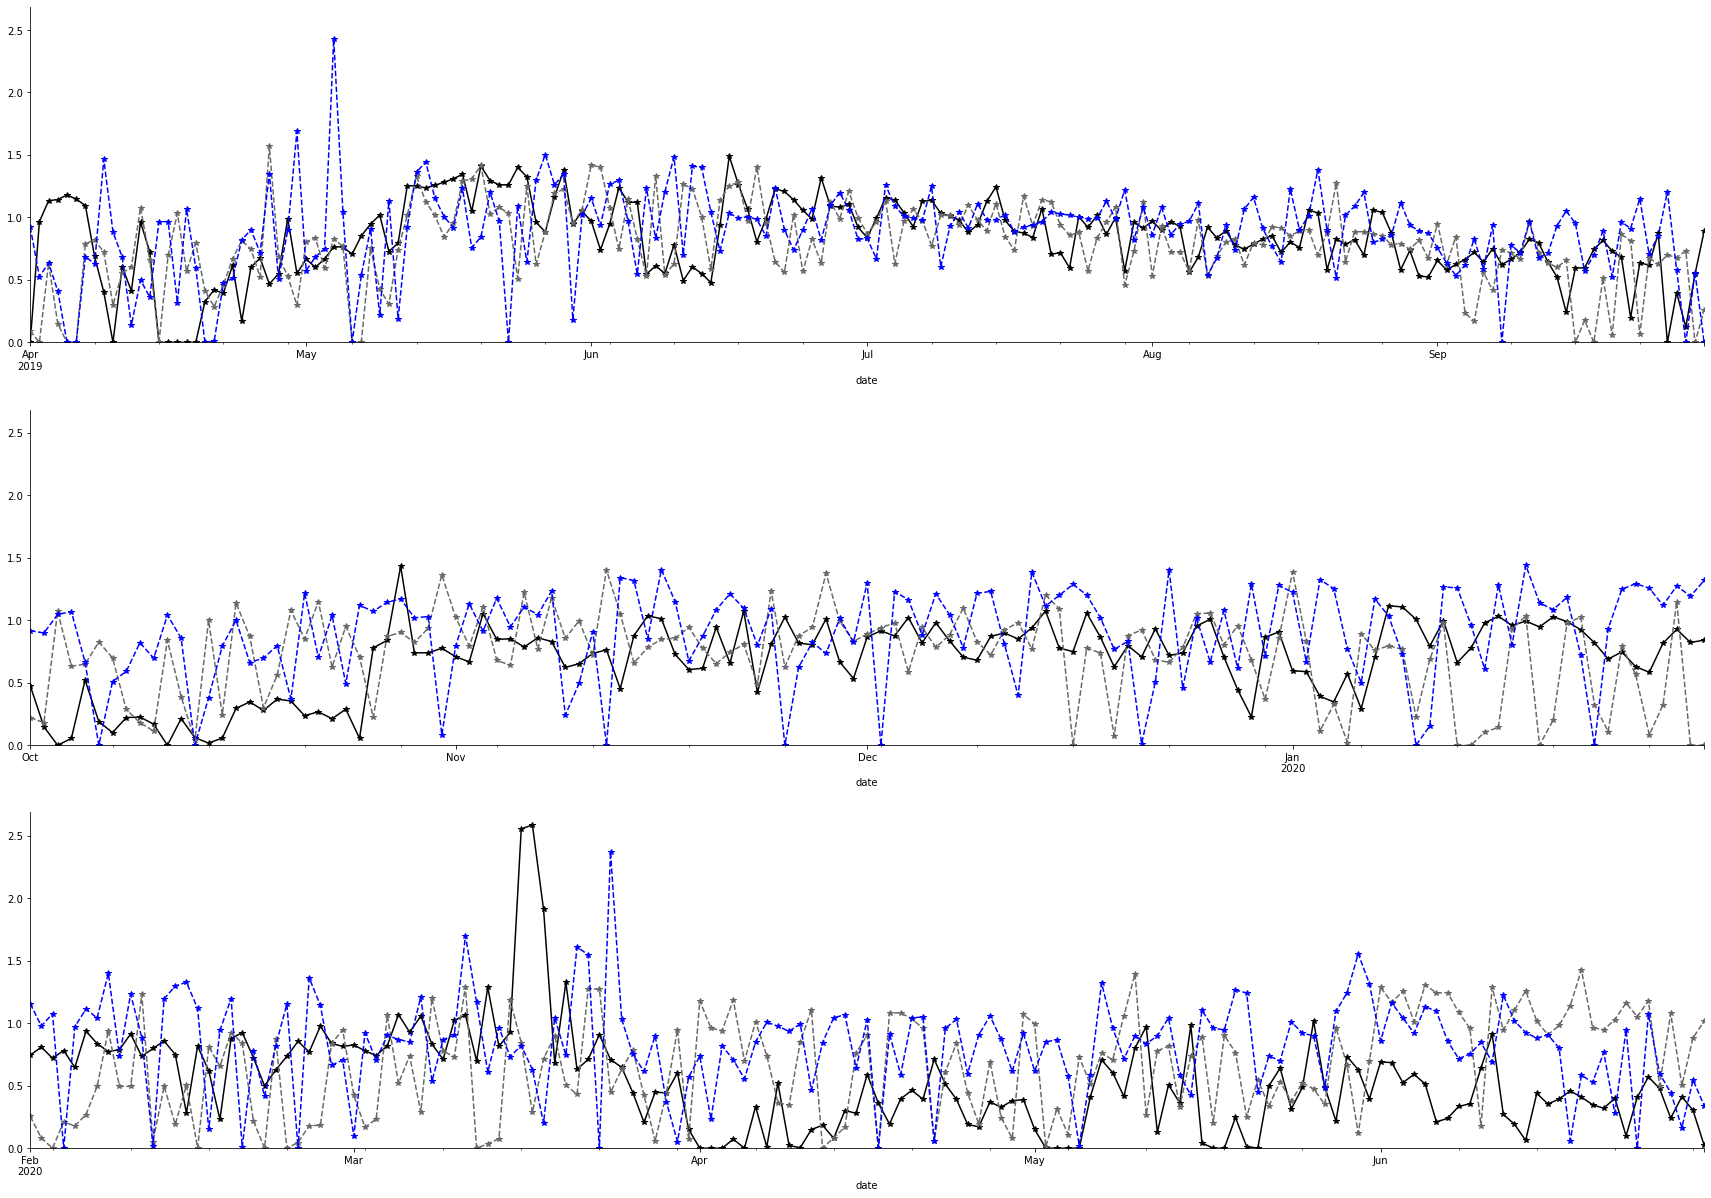

In [45]:
fig, axs = plt.subplots(nrows=3, figsize=(30, 21))


for idx, s in enumerate(SV_list):
    ax = axs[idx]
    #fig, ax = plt.subplots(figsize=(10, 4))
    s['HESTON'].plot(ax=ax, color = 'black',marker='*')
    s['SVJ'].plot(ax=ax,  linestyle='dashed',color='dimgray',marker='*')
    s['SVCJ'].plot(ax=ax,  linestyle='dashed',color='blue',marker='*')
    
# Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_ylim((0, 0.1+max(df['HESTON'])))
    
fig.savefig(f'_output/calibration/figures/volvol_3.pdf')
 

## Volatility comparison BS vs MERTON

In [17]:
sigmas = df[['BLACK_SCHOLES','MERTON']]
#sigmas.plot()

SIGMA_PLOT = {'BLACK_SCHOLES':'blue','MERTON':'darkgrey'}


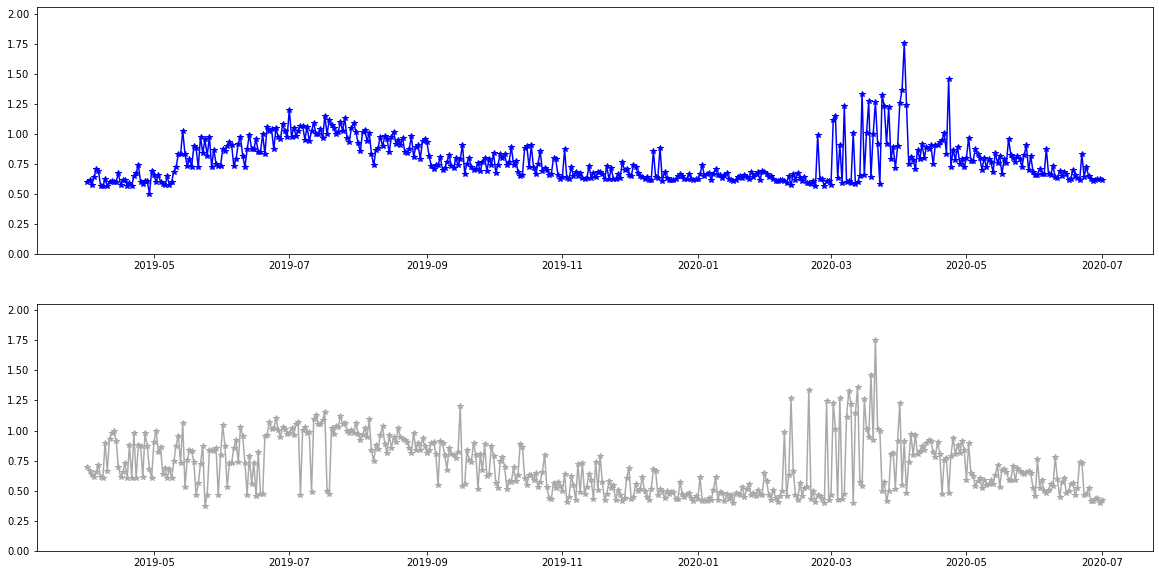

In [18]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 10))

for (x, y), ax in zip(SIGMA_PLOT.items(), axs):
    ax.plot(df[x], color=y, marker='*')
    ax.set_ylim((0,0.3 + max(df['BLACK_SCHOLES'])))


In [19]:
sigmas = df[['BLACK_SCHOLES','MERTON']]

#sigmas['BLACK_SCHOLES'][df['BLACK_SCHOLES'].idxmax()] =np.mean(df['BLACK_SCHOLES'])
#sigmas['MERTON'][df['MERTON'].idxmax()] =np.mean(df['MERTON'])

In [32]:
sigmas1 = sigmas[(sigmas.index >= '2019-04-01') & (sigmas.index < '2019-10-01')]
sigmas2 = sigmas[(sigmas.index >= '2019-10-01') & (sigmas.index < '2020-02-01')]
sigmas3 = sigmas[(sigmas.index >= '2020-02-01') & (sigmas.index < '2020-07-01')]

SIGMA = [sigmas1,sigmas2,sigmas3]

In [52]:
sigmas2.describe()

,BLACK_SCHOLES,MERTON
count,123.000000,123.000000
mean,0.685431,0.533563
std,0.072696,0.106236
min,0.609593,0.400709
25%,0.632096,0.451280
50%,0.662908,0.506148
75%,0.711858,0.584039
max,0.905238,0.888981


### ONE PICTURE 

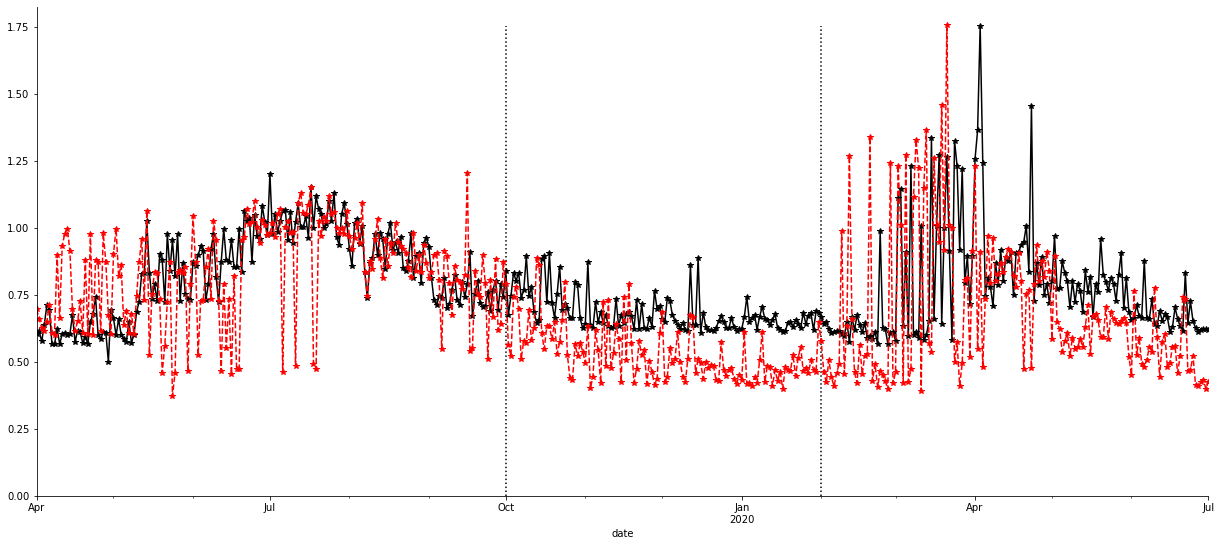

In [21]:
fig, ax = plt.subplots(figsize=(21, 9))
sigmas['BLACK_SCHOLES'].plot(ax=ax, label="Std", color = 'black',marker='*')
sigmas['MERTON'].plot(ax=ax, label="Forecast", linestyle='dashed',color='red',marker='*')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_ylim(ymin=0)

ax.vlines('2019-10-01', 0, ymax=np.max(sigmas['BLACK_SCHOLES']), colors='black', linestyles='dotted') #, 
ax.vlines('2020-02-01', 0, ymax=np.max(sigmas['BLACK_SCHOLES']), colors='black', linestyles='dotted')

fig.savefig(f'_output/calibration/figures/bsjd_vol.pdf', transparent=True)



### 3 PICTURES WITH DIFFERENT AXIS 

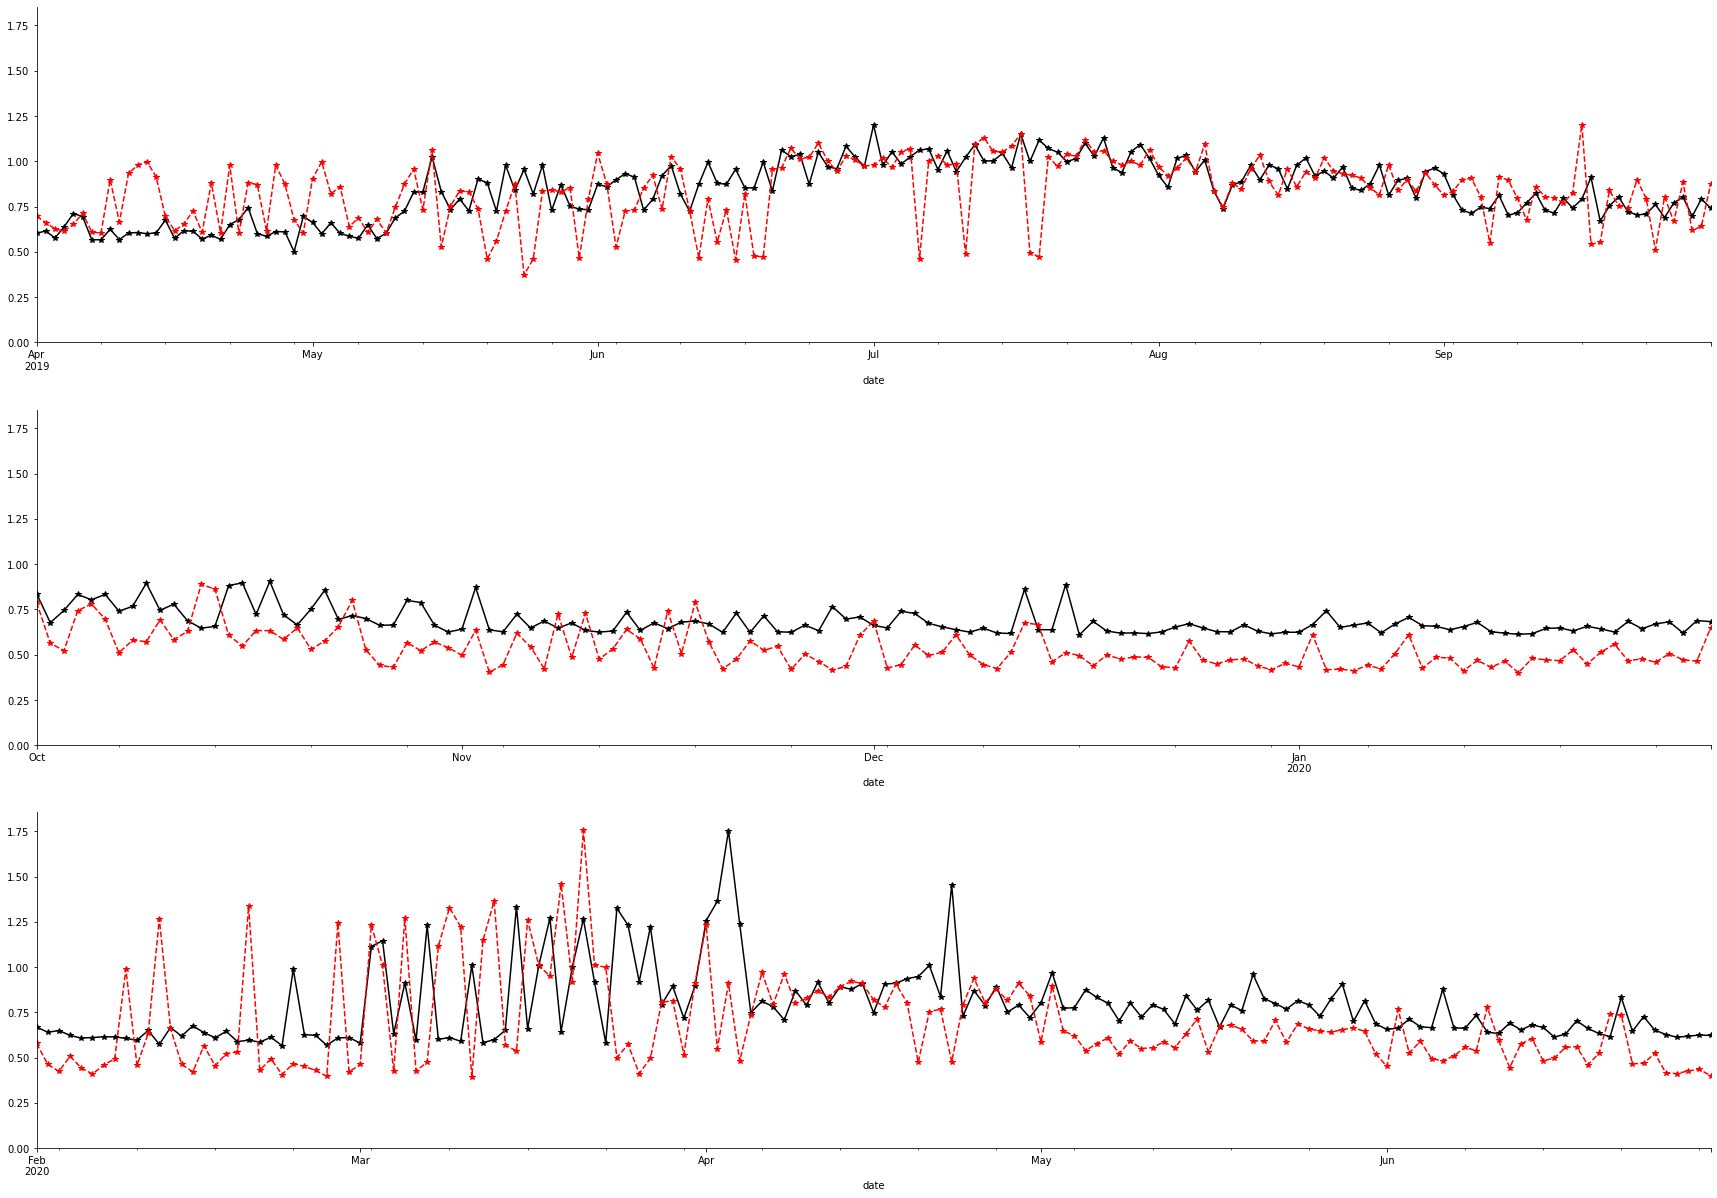

In [33]:
fig, axs = plt.subplots(nrows=3, figsize=(30, 21))


for idx, s in enumerate(SIGMA):
    ax = axs[idx]
    #fig, ax = plt.subplots(figsize=(10, 4))
    s['BLACK_SCHOLES'].plot(ax=ax, label="Std", color = 'black',marker='*')
    s['MERTON'].plot(ax=ax, label="Forecast", linestyle='dashed',color='red',marker='*')

# Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_ylim((0, 0.1+max(sigmas['BLACK_SCHOLES'])))
    
fig.savefig(f'_output/calibration/figures/bsjd_vol2.pdf')
 

## JUMP SIZE ANALYSIS $\lambda$

In [23]:
JUMP = ['MERTON','SVJ','SVCJ']  #'MERTON',

In [24]:
lambda_analysis = pd.read_csv(f'_output/calibration/results/20210227_195345/HESTON/parameters.csv',usecols=['date'])

In [25]:
for j in JUMP:
    lambda_analysis[j] = pd.read_csv(f'_output/calibration/results/20210227_195345/{j}/parameters.csv')['LAMBDA']
    

In [26]:
lambda_analysis.date = pd.to_datetime(lambda_analysis.date,format='%Y%m%d')
lambda_analysis = lambda_analysis.sort_values(by='date')
lambda_analysis = lambda_analysis.set_index('date')

### ONE PICTURE 

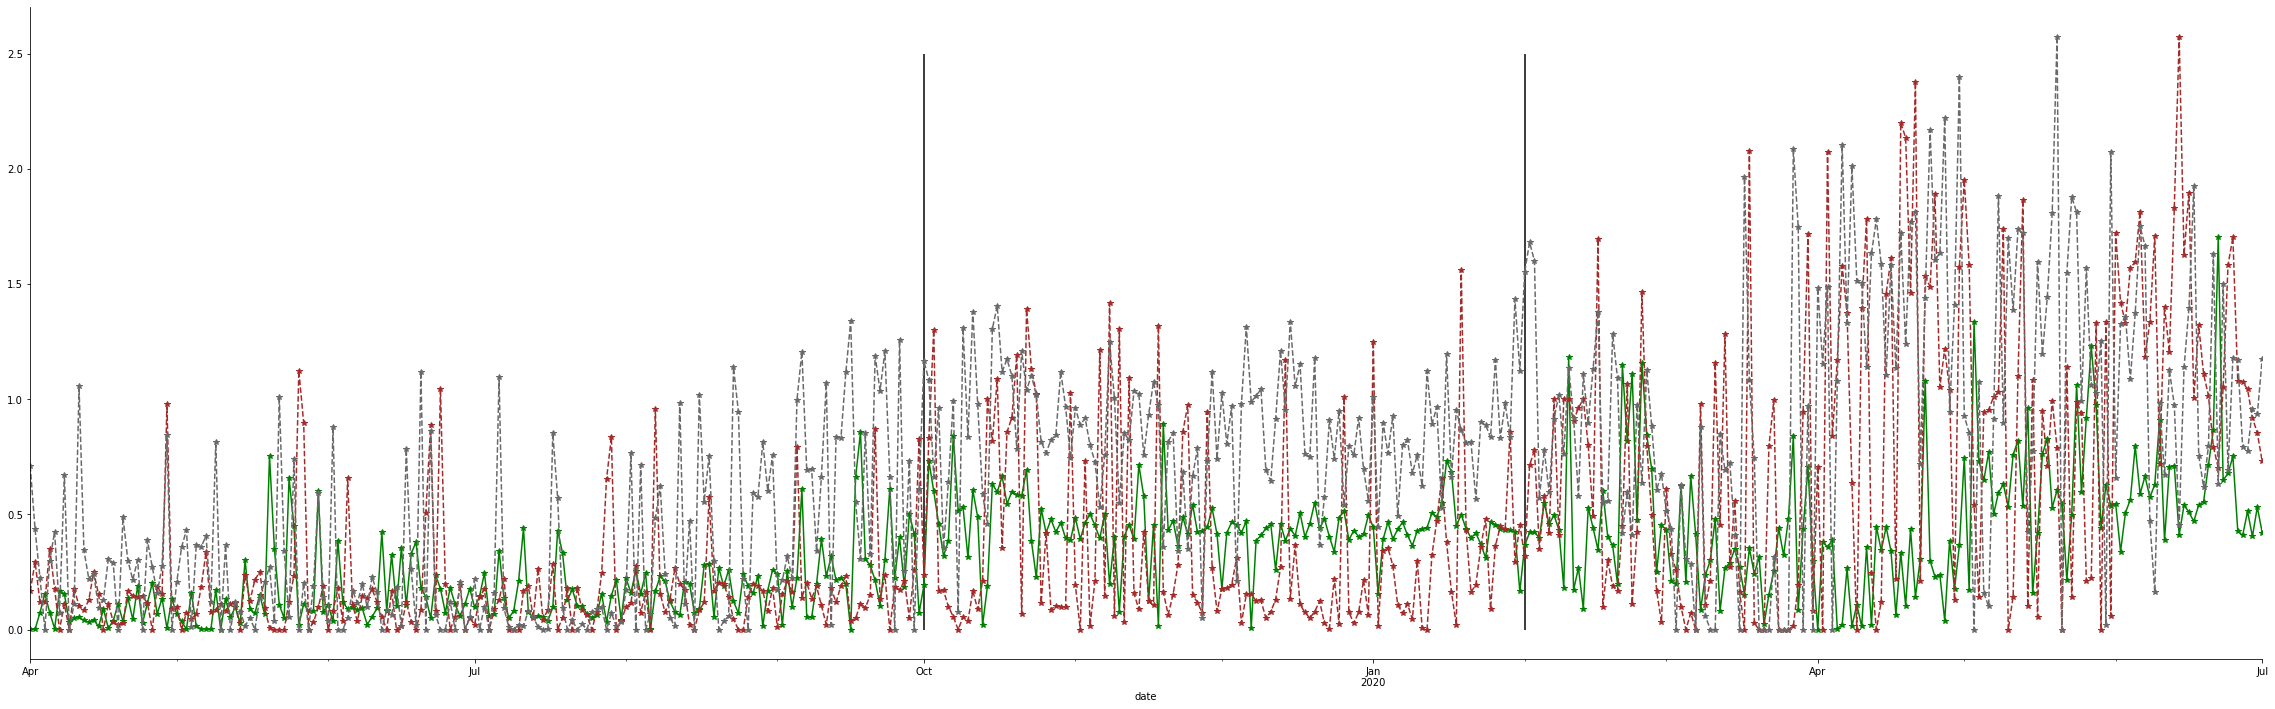

In [27]:
fig, ax = plt.subplots(figsize=(40, 12))
lambda_analysis['MERTON'].plot(ax=ax, label="Std", color = 'green',marker='*')
lambda_analysis['SVJ'].plot(ax=ax, label="Forecast", linestyle='dashed',color='brown',marker='*')
lambda_analysis['SVCJ'].plot(ax=ax, label="Forecast", linestyle='dashed',color='dimgray',marker='*')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#ax.set_ylim(ymin=0)

ax.vlines('2019-10-01', 0, ymax=2.5, colors='black')
ax.vlines('2020-02-01', 0, ymax=2.5, colors='black')

fig.savefig(f'_output/calibration/figures/lambda.pdf')


### MULTIPLE PICTURES

In [28]:
lambda_analysis1 = lambda_analysis[(lambda_analysis.index >= '2019-04-01') & (lambda_analysis.index < '2019-10-01')]
lambda_analysis2 = lambda_analysis[(lambda_analysis.index >= '2019-10-01') & (lambda_analysis.index < '2020-02-01')]
lambda_analysis3 = lambda_analysis[(lambda_analysis.index >= '2020-02-01') & (lambda_analysis.index < '2020-07-01')]

LAMBDA_ANALYSIS = [lambda_analysis1,lambda_analysis2,lambda_analysis3]

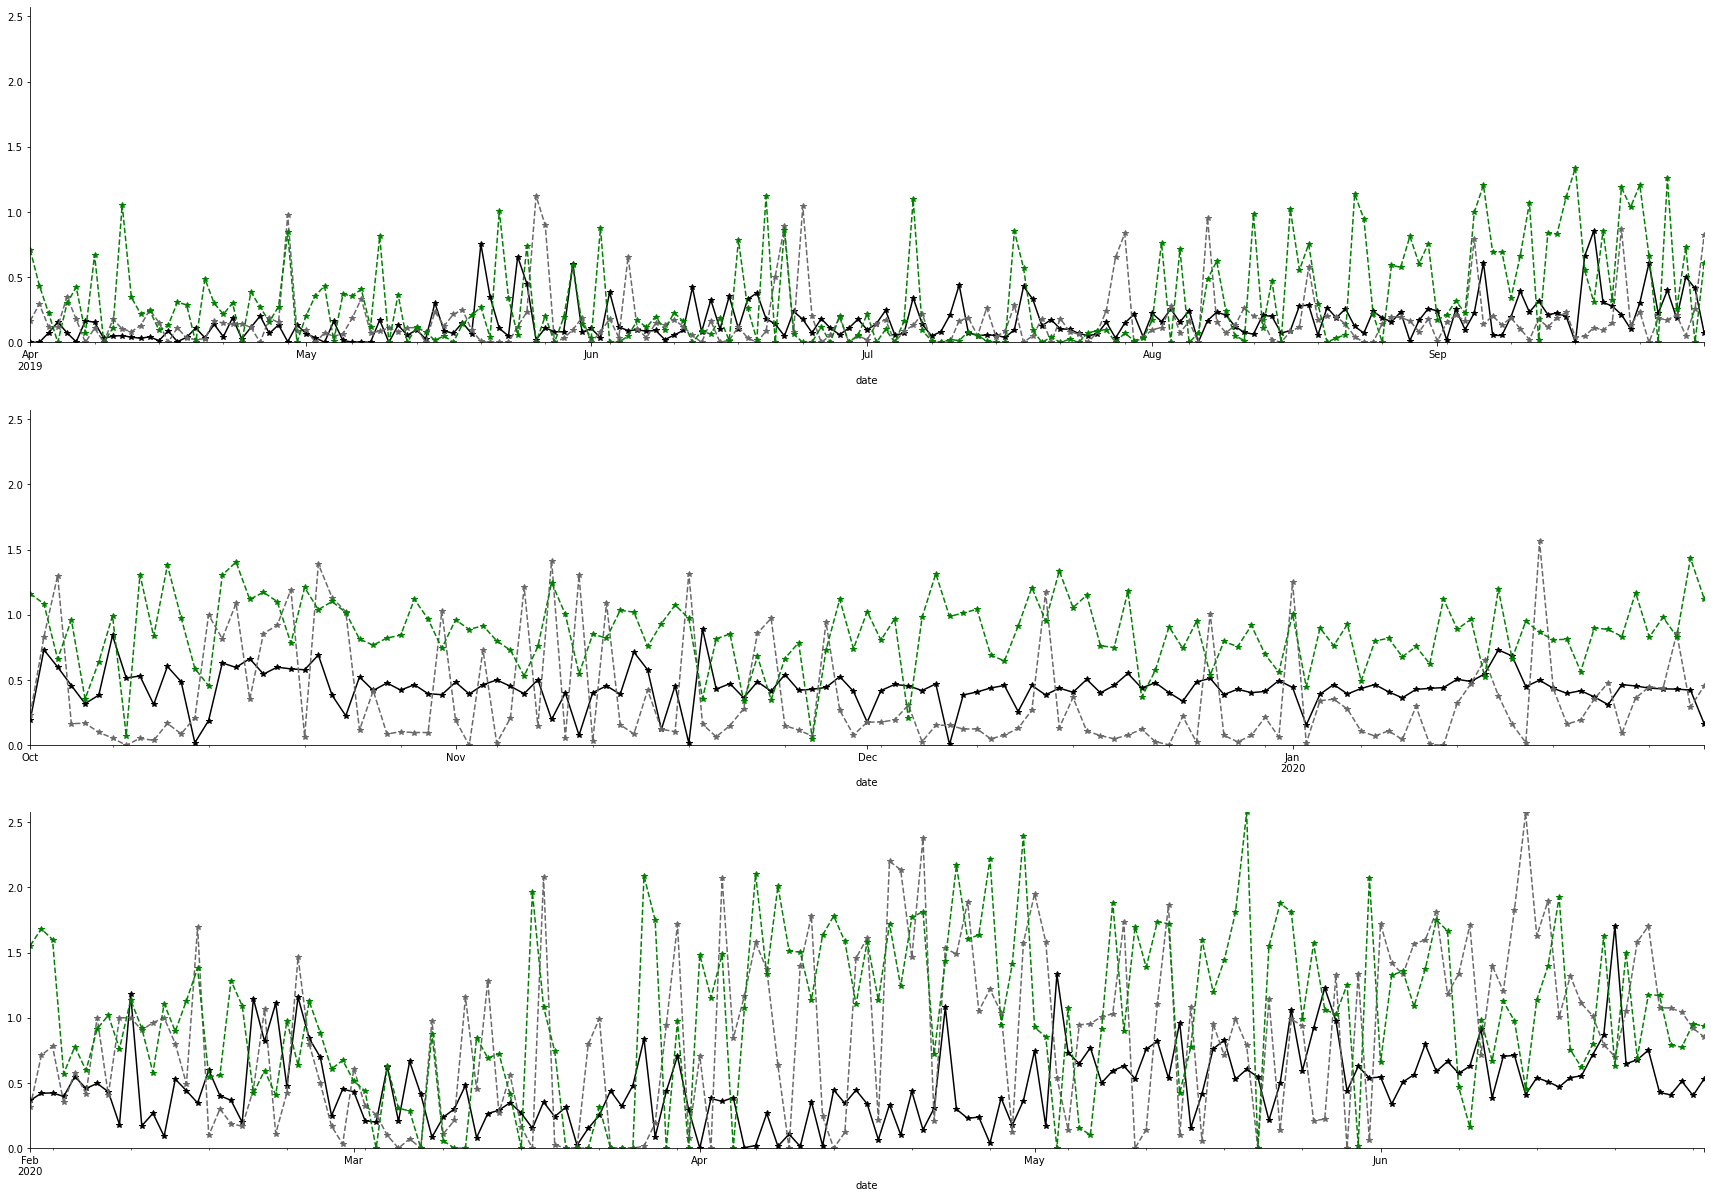

In [29]:
fig, axs = plt.subplots(nrows=3, figsize=(30, 21))

for idx, l in enumerate(LAMBDA_ANALYSIS):
    
    ax = axs[idx]
    
    l['MERTON'].plot(ax=ax, label="Std", color = 'black',marker='*')
    l['SVJ'].plot(ax=ax, label="Forecast", linestyle='dashed',color='dimgrey',marker='*')
    l['SVCJ'].plot(ax=ax, label="Forecast", linestyle='dashed',color='green',marker='*')
    
# Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_ylim((0, max(lambda_analysis['SVCJ'])))

fig.savefig(f'_output/calibration/figures/lambda_all.pdf')
    
